In [1]:
from keras.datasets import mnist

/home/atik/miniconda3/envs/tf/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (None) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

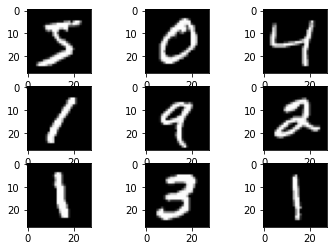

In [3]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [4]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [6]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten

def seq_model(f0,f1,f2,f3,f4,f5,f6,f7,f8,f9):
    model = Sequential()
    #add model layers
    model.add(Conv2D(f0, kernel_size=3, activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(f1, kernel_size=3, activation='relu'))
    model.add(Conv2D(f2, kernel_size=3, activation='relu'))
    model.add(Conv2D(f3, kernel_size=3, activation='relu'))
    model.add(Conv2D(f4, kernel_size=3, activation='relu'))
    model.add(Conv2D(f5, kernel_size=3, activation='relu'))
    model.add(Conv2D(f6, kernel_size=3, activation='relu'))
    model.add(Conv2D(f7, kernel_size=3, activation='relu'))
    model.add(Conv2D(f8, kernel_size=3, activation='relu'))
    model.add(Conv2D(f9, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    #model.summary()
    return model

In [11]:
model = seq_model(4,8,16,24,32,48,64,72,96,128)
model2 = seq_model(128,96,72,64,48,24,32,16,8,4)
model3 = seq_model(4,8,16,24,32,48,32,16,8,4)

In [18]:
#compile model using accuracy to measure model performance
opt = keras.optimizers.RMSprop(learning_rate=1e-3)
#model = model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# Define early_stopping_monitor
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2)

In [19]:
#train the model
h_callback = model.fit(X_train, y_train, batch_size = 64, validation_split=0.2, epochs=5, callbacks= [early_stopping_monitor])

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0653 - val_accuracy: 0.9812
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0581 - val_accuracy: 0.9850
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0489 - accuracy: 0.9861 - val_loss: 0.0678 - val_accuracy: 0.9798
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0806 - val_accuracy: 0.9773


In [20]:
loss, acc= model.evaluate(X_test, y_test)
print('Test Accuracy: %f' % (acc*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9795
Test Accuracy: 97.950000


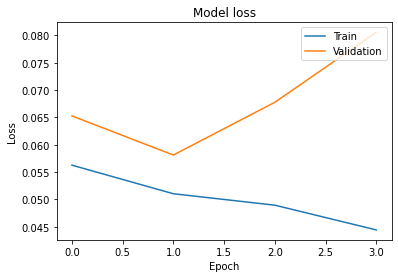

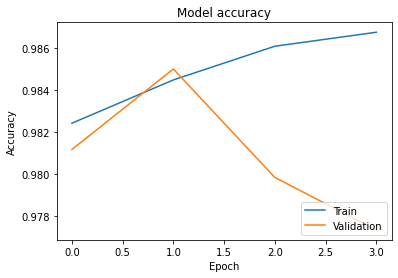

In [21]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.show()

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])